In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
import matplotlib.pyplot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Defining srtucture of the circuit

qr = QuantumRegister(3, name="q")    
crz = ClassicalRegister(1, name="crz") 
crx = ClassicalRegister(1, name="crx") 
circuit = QuantumCircuit(qr, crz, crx)

<IPython.core.display.Math object>

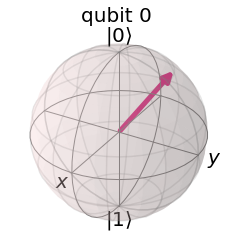

In [3]:
#Creating a qubit in random state
psi = random_state(1)

# Display it nicely
array_to_latex(psi, pretext="|\\psi\\rangle =")
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

In [4]:
init_gate = Initialize(psi)
init_gate.label = "init"

#append inti gate to the qc
circuit.append(init_gate, [0])
circuit.barrier()

In [5]:
#Creating entanglement in q1 and q2

circuit.h(1)
circuit.cx(1,2)
circuit.barrier()

In [6]:
#Defining gates for sender

circuit.cx(0,1)
circuit.h(0)
circuit.barrier()

In [7]:
#Measuring the bits and sending it to classical bits

circuit.measure((0,1), (0,1))

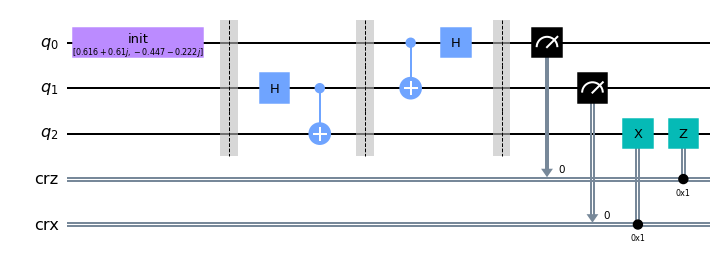

In [8]:
#reciever gates

circuit.x(2).c_if(crx, 1)
circuit.z(2).c_if(crz, 1)
circuit.draw('mpl')

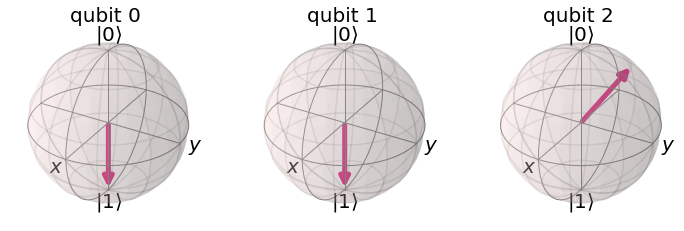

In [9]:
#Using Statevector simuator

sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(circuit)
out_vector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(out_vector)

qubit 0 has been telepoted to qubit 2, while q0 and q1 have been initailized to |1>

In [10]:
#To check the gates followed in order to confirm teleportation

circuit.barrier()
inverse_init_gate = init_gate.gates_to_uncompute()
circuit.append(inverse_init_gate, [2])

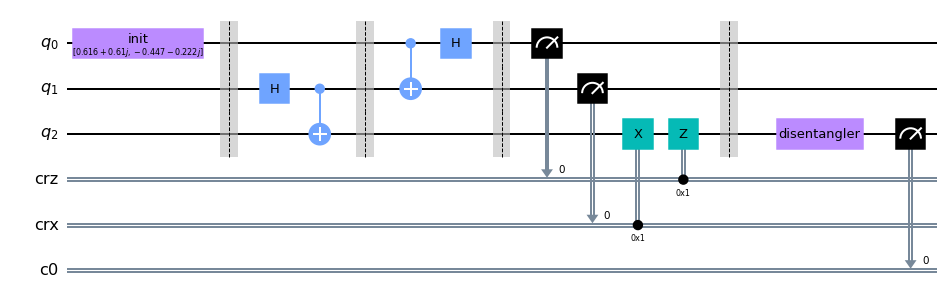

In [11]:
#To measure the third qubit

result_cb = ClassicalRegister(1)
circuit.add_register(result_cb)
circuit.measure(2,2)

circuit.draw('mpl')

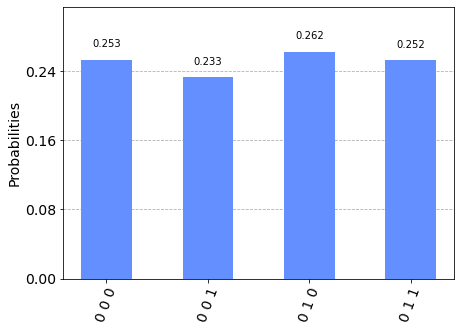

In [12]:
#Using Quasm Simulator

qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(circuit, qasm_sim)
qobj = assemble(t_qc)
counts = qasm_sim.run(qobj).result().get_counts()
plot_histogram(counts)

teleportation confirmed as there is a 100% chance of measuring q2 in |0>